# Importing Libraries

In [127]:
from samples import *
import util
import numpy as np
from sklearn.metrics import confusion_matrix

# Loading data

In [128]:
import doctest
doctest.testmod() # Test the interactive sessions in function comments
n = 5000
n_test = 1000
n_validation = 1000

items = loadDataFile("digitdata/trainingimages", n,28,28)
labels = loadLabelsFile("digitdata/traininglabels", n)

items_validation = loadDataFile("digitdata/validationimages", n_validation,28,28)
labels_validation = loadLabelsFile("digitdata/validationlabels", n_validation)

items_test = loadDataFile("digitdata/validationimages", n_test,28,28)
labels_test = loadLabelsFile("digitdata/validationlabels", n_test)

#Adding validation data to training data
# items = items + items_validation
# labels = labels + labels_validation

#Adding validation data to testing data
items_test = items_test + items_validation
labels_test = labels_test + labels_validation

Printing Structure of a digit

In [129]:
print(items[0].getPixels())
print(labels[0])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0

5
                            
                            
                            
                            
                            
                +++++##+    
        +++++######+###+    
       +##########+++++     
        #######+##          
        +++###  ++          
           +#+              
           +#+              
            +#+             
            +##++           
             +###++         
              ++##++        
                +##+        
                 ###+       
              +++###        
            ++#####+        
          ++######+         
        ++######+           
       +######+             
    ++######+               
    +####++                 
                            
                            
                            


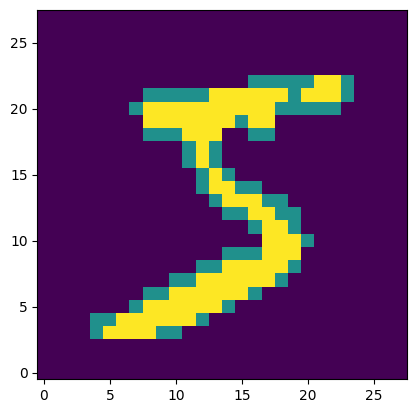

In [130]:
import matplotlib.pyplot as plt
from scipy import ndimage

rotated_img = ndimage.rotate(items[0].getPixels(), 90)
plt.imshow(rotated_img,origin='lower')
print(labels[0])
print(items[0])

# Preprocessing data

In [131]:
x_train = []
for i in range(n):
    x_train.append(items[i].getPixels())


x_train= np.array(x_train)
y_train = np.array(labels)

x_train = x_train.reshape(n,784) #784 = 28*28

x_test = []
for i in range(n_test+n_validation):
    x_test.append(items_test[i].getPixels())

x_test= np.array(x_test)
y_test = np.array(labels_test)

x_test = x_test.reshape(n_test+n_validation,784)

print(x_train.shape)
print(y_train.shape)
print(y_train[0])
print(x_train[0])

(5000, 784)
(5000,)
5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0
 0 0 0 0 0 0 0 0 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 0 0 0 0 0 0 0 0 1
 2 2 1 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 0 0 0 0 0 0 0 0 0 1 2 2 1 0 0 0 0 0 0
 0 0 0 0 1 2 2 2 1 0 0 0 0 0 0 0 0 0 1 2 2 2 1 1 0 0 0 0 0 0 0 0 1 2 2 2 0
 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 1 1 0 0 0 0 0 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 1 1 2 2 1 0 0 0 0 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 1 2 2
 1 0 0 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 0 0 1 2 1 0 0 1 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 1 2 2 2 1 0 0 0 1 2 2 1 0 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0
 1 

In [132]:
print(len(x_train[0]))

784


# Learning with Support Vector Machine

In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

svc = SVC(kernel='linear',random_state=1)
fit = svc.fit(x_train,y_train)
y_pred = fit.predict(x_test)
# print(svc.score(x_test,y_test))
print(accuracy_score(y_test,y_pred))

0.891


In [134]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    svc = SVC(kernel='rbf',random_state=1, C=c).fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    print(f"{c}: {accuracy_score(y_test,y_pred)}")
    print(confusion_matrix(y_test,y_pred))

0.1: 0.885
[[162   0   0   0   0   4   4   0   0   0]
 [  0 248   0   0   0   0   2   0   2   0]
 [  2   0 198   4   2   0   2   8  14   2]
 [  0   0   2 174   0  18   6   6   6   2]
 [  0   2   2   0 196   2   2   0   0  16]
 [  2   0   2   4   2 160   0   0   2   2]
 [  6   0   6   0   2   4 156   0   0   0]
 [  0   8   6   0   6   0   0 164   2  12]
 [  4   0   2  10   8   2   2   2 142   6]
 [  0   2   0   2   6   0   0   2   6 170]]
1: 0.933
[[166   0   0   0   0   2   2   0   0   0]
 [  0 248   0   0   0   0   2   0   2   0]
 [  0   0 216   0   2   0   2   6   6   0]
 [  0   0   0 194   0  12   2   4   0   2]
 [  0   0   2   0 204   0   0   2   0  12]
 [  0   0   0   2   2 164   2   0   2   2]
 [  6   0   2   0   2   0 164   0   0   0]
 [  0   2   4   2   2   0   0 182   0   6]
 [  4   0   2   6   4   0   0   2 160   0]
 [  0   0   0   2   6   0   0   6   6 168]]
10: 0.943
[[168   0   0   0   0   0   2   0   0   0]
 [  0 250   2   0   0   0   0   0   0   0]
 [  0   2 218   2   0 

## Trying different kernels

In [135]:
kernels = ['linear', 'rbf', 'poly']
print("kernel: accuracy")
for kernel in kernels:
  svc = SVC(kernel=kernel,random_state=1).fit(x_train, y_train)
  y_pred = svc.predict(x_test)
  print(f"{kernel}: {accuracy_score(y_test,y_pred)}")

kernel: accuracy
linear: 0.891
rbf: 0.933
poly: 0.917


## Trying different gammas

In [136]:
gammas = [0.1, 1, 10, 100, 'scale', 'auto']
print("gamma: accuracy")
for g in gammas:
  svc = SVC(gamma=g,random_state=1).fit(x_train, y_train)
  y_pred = svc.predict(x_test)
  print(f"{g}: {accuracy_score(y_test,y_pred)}")
  

gamma: accuracy
0.1: 0.199
1: 0.126
10: 0.126
100: 0.126
scale: 0.933
auto: 0.915


## Trying different degrees of polynomials

In [137]:
degrees = [0, 1, 2, 3, 4, 5, 6]
print("degree: accuracy")
for degree in degrees:
  svc = SVC(kernel='poly',random_state=1, degree=degree).fit(x_train, y_train)
  y_pred = svc.predict(x_test)
  print(f"{degree}: {accuracy_score(y_test,y_pred)}")

degree: accuracy
0: 0.126
1: 0.909
2: 0.934
3: 0.917
4: 0.886
5: 0.85
6: 0.805


### Using the best hyperparameters from each of the previous tries

In [164]:
svc = SVC(kernel='rbf',random_state=1, C=100,gamma='scale').fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(f"{accuracy_score(y_test,y_pred)}")

0.945


# Hyperparameters tuning

In [157]:
# Hyperparameters combinations
hyperparameters = [{
    "C":[0.1, 1, 10, 100],
    "kernel":['rbf','linear','poly','sigmoid'],
    "gamma":[0.1,'auto','scale'],
    "shrinking":[True,False],
    "probability":[False,True],
    
}
,{
    "C":[0.1, 1, 10, 100],
    "kernel":['poly'],
    "degree":[1,2,3,4,5,6,7,8,9]
}
]


## Using RandomizedSearchCV to search for best parameters
We used randomized to pick a random 10 hyperparameter combinations because exhaustive search require too much time to search for all combinations

In [158]:
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# # search = GridSearchCV(estimator=svc,param_grid=hyperparameters,scoring='accuracy',verbose=5,n_jobs=-1)
search = RandomizedSearchCV(estimator=SVC(random_state=1),param_distributions=hyperparameters,n_iter=10,cv=5,scoring='accuracy',n_jobs=-1)

In [159]:
f = search.fit(x_train,y_train)

In [160]:
f.best_params_

{'shrinking': False,
 'probability': False,
 'kernel': 'poly',
 'gamma': 0.1,
 'C': 0.1}

In [161]:
f.best_score_

0.9423999999999999